# This task has 25000 images of cats and dogs.

# 1. read the data
# 2. encode the y into categorical (binary task) -> Len(y) * 2
# 3. build a simple dense neural network
# 4. build a convolutional neural network
# 5. convolutional auto encoder (you can use the code from the Workshop)
# 6. Cluster the code from 5. and visualize

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import glob
import cv2

import tensorflow as tf
import random

from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def read_data(images):
  dataset = np.zeros((len(images), width, height, 3))
  labels = []

  for i, image in tqdm(enumerate(images), total=len(images)):

      current_image = cv2.imread(image, cv2.COLOR_BGR2RGB).astype(np.float32)
      current_image = cv2.resize(current_image, (height, width))
      current_image = current_image/255
      dataset[i] = current_image

      parts = image.split('/')

      last_part = parts[-1]
      label = last_part.split('.')[0]
      labels.append(label)

  return dataset, labels

In [ ]:
#Load images paths
images = glob.glob('/content/drive/MyDrive/Data Science academy /6. Machine Learning/homework6/train/*')

In [ ]:
# Shuffle image paths
random.seed(42)
random.shuffle(images)

In [ ]:
# Splitting train dataset
width = 80
height = 80
X,y = read_data(images[:5000])

100%|██████████| 5000/5000 [13:46<00:00,  6.05it/s] 


In [ ]:
#Shape
X.shape

(5000, 80, 80, 3)

In [ ]:
# Lables
np.unique(y)

array(['cat', 'dog'], dtype='<U3')

In [ ]:
# Counting labels using Counter to check if i have balanced class
from collections import Counter
Counter(y)

Counter({'cat': 2542, 'dog': 2458})

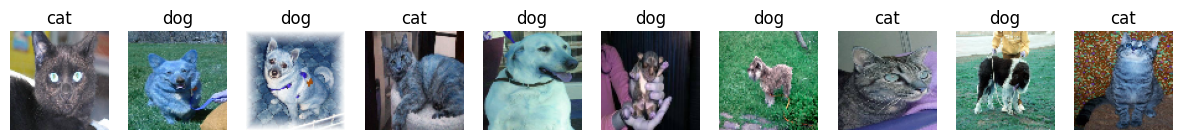

In [ ]:
# Checking if image match the class
plt.figure(figsize = (15,15))
plt.subplots_adjust(hspace = 0.5)

for i in range(10):

  plt.subplot(1,10,i+1)
  plt.imshow(X[i])
  plt.title(y[i])
  plt.axis('off')
plt.show()

In [ ]:
# Encoding target column
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
# plt.imshow(X[0])
# plt.title(y[0])
# plt.show()

y[0], y[1] # CAT -> 0 ; DOG -> 1

(0, 1)

In [ ]:
y.shape

(5000,)

In [ ]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                      random_state=42,
                                                      shuffle=False)

X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test,
                                                    test_size=0.5,
                                                      random_state=42,
                                                      shuffle=False)

In [ ]:
# from keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(
#         rotation_range=100,
#         width_shift_range=0.2,
#         height_shift_range=0.2,
#         shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True,
#         fill_mode='nearest')


# train_dataset = datagen.flow(X_train,y_train, batch_size = 64)

In [ ]:
# plt.imshow(X_valid[0])
# plt.title(y_valid[0])

In [ ]:
#Shape
X_train.shape, X_valid.shape, X_test.shape

((4000, 80, 80, 3), (500, 80, 80, 3), (500, 80, 80, 3))

In [ ]:
y_train.shape, y_valid.shape, y_test.shape

((4000,), (500,), (500,))

In [ ]:
# from keras.utils import to_categorical
# y_new_ = to_categorical(y_new_)

# Simple Dense NN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout, Flatten, MaxPooling2D, Conv2D, Conv2DTranspose, UpSampling2D, BatchNormalization, Reshape
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import regularizers


In [ ]:
#Architecture
simple_model = Sequential([
    Flatten(input_shape=(80, 80, 3)),
    Dense(units=512, activation='relu'),
    Dropout(0.3),
    Dense(units=128, activation='relu'),
    Dropout(0.3),
    Dense(units=64, activation='relu'),
    Dropout(0.3),
    Dense(units=32, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

# Compile model
simple_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

# model summary
simple_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 19200)             0         
                                                                 
 dense_6 (Dense)             (None, 512)               9830912   
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               65664     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dropout_6 (Dropout)         (None, 64)               

In [ ]:
# Defining early stopping
es = EarlyStopping(monitor='val_loss', patience=5, min_delta=0.0001)
cp = ModelCheckpoint(filepath = 'final.{epoch:02d}-{val_loss:.2f}.h5',
                     save_best_only=True)

In [ ]:
# Fit the model
simple_history = simple_model.fit(X_train,y_train, batch_size = 64,
                                  epochs = 100,
                                  validation_data = [X_valid,y_valid],
                                  callbacks = [es,cp])

Epoch 1/100
63/63 [==============================] - 3s 14ms/step - loss: 1.2504 - accuracy: 0.5063 - val_loss: 0.7022 - val_accuracy: 0.4900
Epoch 2/100
63/63 [==============================] - 1s 9ms/step - loss: 0.7583 - accuracy: 0.4980 - val_loss: 0.6901 - val_accuracy: 0.5040
Epoch 3/100
63/63 [==============================] - 1s 10ms/step - loss: 0.7123 - accuracy: 0.5027 - val_loss: 0.6945 - val_accuracy: 0.5080
Epoch 4/100
63/63 [==============================] - 1s 9ms/step - loss: 0.7084 - accuracy: 0.5060 - val_loss: 0.6924 - val_accuracy: 0.5060
Epoch 5/100
63/63 [==============================] - 1s 9ms/step - loss: 0.6997 - accuracy: 0.5048 - val_loss: 0.6957 - val_accuracy: 0.4840
Epoch 6/100
63/63 [==============================] - 1s 9ms/step - loss: 0.6890 - accuracy: 0.5297 - val_loss: 0.6858 - val_accuracy: 0.5120
Epoch 7/100
63/63 [==============================] - 1s 9ms/step - loss: 0.6921 - accuracy: 0.5195 - val_loss: 0.6913 - val_accuracy: 0.5660
Epoch 8/100

In [ ]:
# Evaluate
simple_model.evaluate(X_test,y_test)

16/16 [==============================] - 0s 6ms/step - loss: 0.6652 - accuracy: 0.6120


[0.6652398705482483, 0.6119999885559082]

In [ ]:
# Defining function for plotting model loss and accuracy
def plot_history(history):
    # Accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()


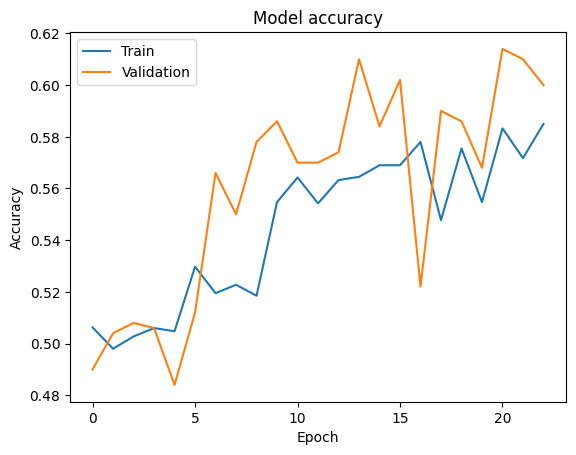

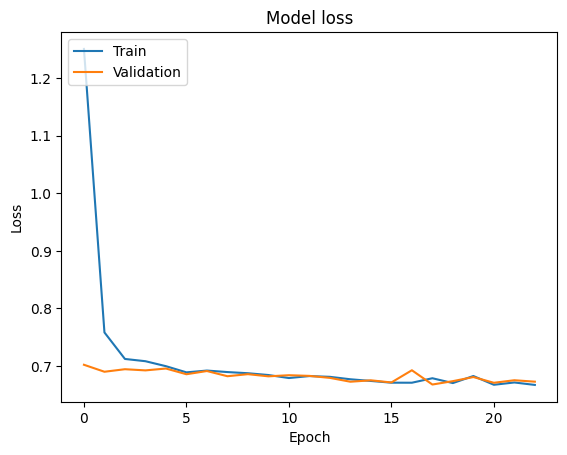

In [ ]:
plot_history(simple_history)

# Convolutional NN

In [ ]:
#Architecture
cnn_model = Sequential([
    Conv2D(filters = 32, kernel_size = (3,3),
           activation = 'relu',padding = 'same', input_shape = (80, 80, 3)),
    MaxPooling2D(pool_size = (2,2),padding = 'same'),
    Conv2D(filters = 64, kernel_size = (3,3),
           activation = 'relu',
           padding = 'same'),
    MaxPooling2D(pool_size = (2,2),padding = 'same'),
    Conv2D(filters = 128, kernel_size = (3,3),
           activation = 'relu',
           padding = 'same'),
    MaxPooling2D(pool_size = (2,2),padding = 'same'),
    Flatten(),
    Dense(units = 256, activation = 'relu'),
    Dropout(0.5),
    Dense(units = 128, activation = 'relu'),
    Dense(units = 1, activation = 'sigmoid')
])

# Compile model
cnn_model.compile(optimizer = 'adam',
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy'])

# CNN model summary
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 80, 80, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 40, 40, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 40, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 20, 20, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 10, 10, 128)      

In [ ]:
# CNN model fit
cnn_model_history = cnn_model.fit(X_train,y_train,batch_size = 64,
                                  epochs = 100,
                                  validation_data = [X_valid,y_valid],
                                  callbacks=[es,cp])

Epoch 1/100
63/63 [==============================] - 6s 31ms/step - loss: 0.6925 - accuracy: 0.5318 - val_loss: 0.6815 - val_accuracy: 0.5280
Epoch 2/100
63/63 [==============================] - 1s 19ms/step - loss: 0.6558 - accuracy: 0.6185 - val_loss: 0.6338 - val_accuracy: 0.6720
Epoch 3/100
63/63 [==============================] - 1s 19ms/step - loss: 0.5948 - accuracy: 0.6842 - val_loss: 0.5718 - val_accuracy: 0.7040
Epoch 4/100
63/63 [==============================] - 1s 20ms/step - loss: 0.5570 - accuracy: 0.7130 - val_loss: 0.5801 - val_accuracy: 0.7200
Epoch 5/100
63/63 [==============================] - 1s 19ms/step - loss: 0.5156 - accuracy: 0.7467 - val_loss: 0.5829 - val_accuracy: 0.7120
Epoch 6/100
63/63 [==============================] - 1s 20ms/step - loss: 0.4611 - accuracy: 0.7803 - val_loss: 0.5281 - val_accuracy: 0.7620
Epoch 7/100
63/63 [==============================] - 1s 18ms/step - loss: 0.4186 - accuracy: 0.8018 - val_loss: 0.4989 - val_accuracy: 0.7640
Epoch 

In [ ]:
# Evaluate
cnn_model.evaluate(X_test,y_test)

16/16 [==============================] - 0s 25ms/step - loss: 0.6287 - accuracy: 0.7700


[0.6286741495132446, 0.7699999809265137]

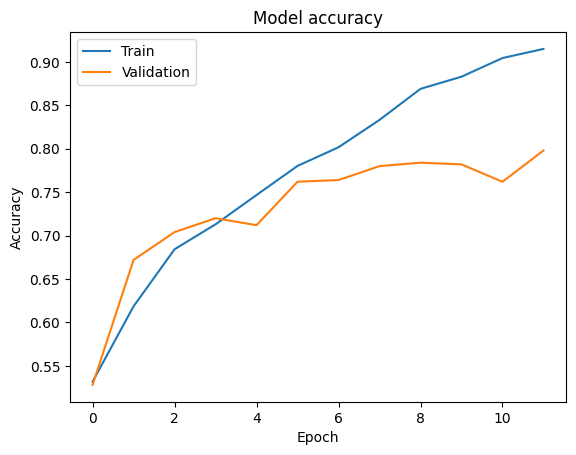

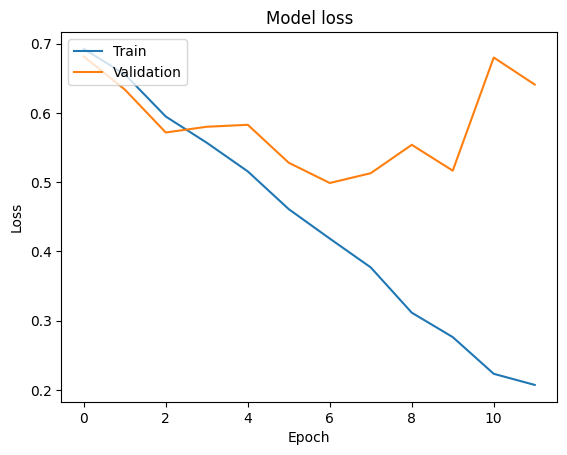

In [ ]:
# Visualize
plot_history(cnn_model_history)

# CNN Autoencoder

In [ ]:
from keras.models import Model

In [ ]:
# encoder
inputs = Input(shape = (80,80,3))
h_l = Conv2D(filters = 16, kernel_size = (3,3),
             activation = 'relu',
             padding='same')(inputs)
h_l = MaxPooling2D(pool_size = (2,2), padding = 'same')(h_l)
h_l = Conv2D(filters = 8, kernel_size = (3,3),
             activation = 'relu',
             padding='same')(h_l)
h_l = MaxPooling2D(pool_size = (2,2), padding = 'same')(h_l)
h_l = Conv2D(filters = 8, kernel_size = (3,3),
             activation = 'relu',
             padding='same')(h_l)
# h_l = MaxPooling2D(pool_size = (2,2), padding = 'same')(h_l)
# h_l = Conv2D(filters = 8, kernel_size = (3,3),
#              activation = 'relu',
#              padding='same')(h_l)
enc = MaxPooling2D(pool_size = (2,2), padding = 'same')(h_l)

#code
code = Flatten()(enc)
code = Dense(2, activation='linear')(code)

#decode
h_l = Dense(10*10*8, activation='relu')(code)
h_l = Reshape((10, 10, 8))(h_l)
h_l = Conv2D(filters=8, kernel_size=(3, 3),
             activation='relu',
             padding='same')(h_l)
h_l = UpSampling2D((2, 2))(h_l)
h_l = Conv2D(filters=8, kernel_size=(3, 3),
             activation='relu',
             padding='same')(h_l)
h_l = UpSampling2D((2, 2))(h_l)
h_l = Conv2D(filters=16, kernel_size=(3, 3),
             activation='relu',
             padding='same')(h_l)
h_l = UpSampling2D((2, 2))(h_l)
# h_l = Conv2D(filters=32, kernel_size=(3, 3),
#              activation='relu',
#              padding='same')(h_l)
# h_l = UpSampling2D((2, 2))(h_l)

outputs = Conv2D(filters=3, kernel_size=(3, 3),
                 activation='sigmoid',
                 padding='same')(h_l)

# outputs.shape

# Model
cnn_ae = Model(inputs,outputs)

#compile
cnn_ae.compile(optimizer = 'adam',
               loss = 'binary_crossentropy',
               metrics = ['accuracy'])

#Model summary
cnn_ae.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 80, 80, 3)]       0         
                                                                 
 conv2d_43 (Conv2D)          (None, 80, 80, 16)        448       
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 40, 40, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_44 (Conv2D)          (None, 40, 40, 8)         1160      
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 20, 20, 8)         0         
 ng2D)                                                           
                                                                 
 conv2d_45 (Conv2D)          (None, 20, 20, 8)         584 

In [ ]:
# Fit model
cnn_ae_history = cnn_ae.fit(X_train,X_train, batch_size = 128,
                            epochs = 100,
                            validation_data=(X_valid, X_valid),
                            callbacks = [es,cp])

Epoch 1/100
32/32 [==============================] - 6s 71ms/step - loss: 0.6902 - accuracy: 0.5906 - val_loss: 0.6860 - val_accuracy: 0.6118
Epoch 2/100
32/32 [==============================] - 1s 36ms/step - loss: 0.6844 - accuracy: 0.5959 - val_loss: 0.6766 - val_accuracy: 0.6097
Epoch 3/100
32/32 [==============================] - 1s 36ms/step - loss: 0.6734 - accuracy: 0.5931 - val_loss: 0.6632 - val_accuracy: 0.6087
Epoch 4/100
32/32 [==============================] - 1s 37ms/step - loss: 0.6598 - accuracy: 0.5949 - val_loss: 0.6539 - val_accuracy: 0.6108
Epoch 5/100
32/32 [==============================] - 1s 41ms/step - loss: 0.6542 - accuracy: 0.5950 - val_loss: 0.6502 - val_accuracy: 0.6059
Epoch 6/100
32/32 [==============================] - 1s 38ms/step - loss: 0.6514 - accuracy: 0.5947 - val_loss: 0.6485 - val_accuracy: 0.6066
Epoch 7/100
32/32 [==============================] - 1s 34ms/step - loss: 0.6496 - accuracy: 0.5951 - val_loss: 0.6473 - val_accuracy: 0.6095
Epoch 

In [ ]:
# Evaluate
cnn_ae.evaluate(X_test,X_test)

16/16 [==============================] - 0s 26ms/step - loss: 0.6470 - accuracy: 0.5908


[0.6470133662223816, 0.5908409357070923]

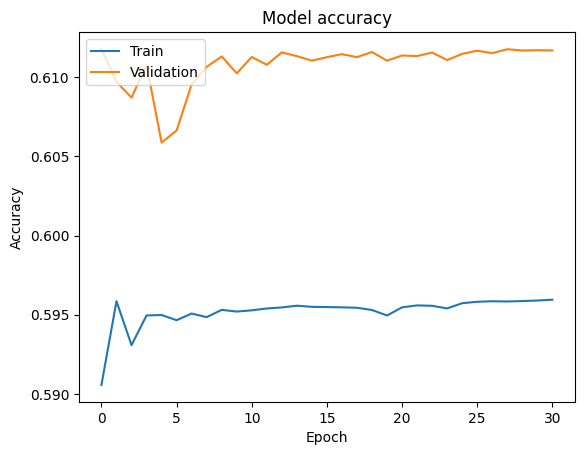

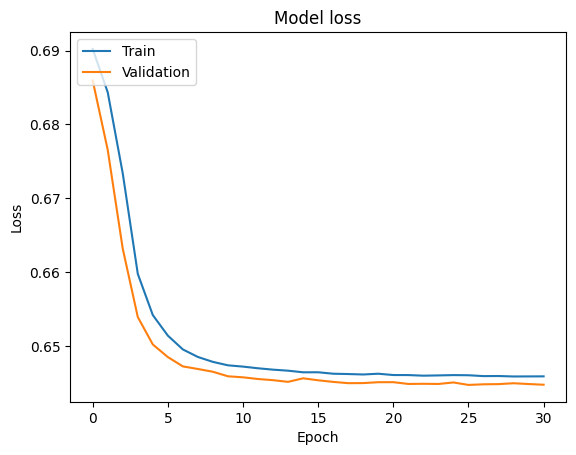

In [ ]:
plot_history(cnn_ae_history)

# Clustering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
predictions = cnn_ae.predict(X_test)
predictions = predictions.reshape(predictions.shape[0], -1)

16/16 [==============================] - 0s 6ms/step


In [ ]:
cnn_cluster = KMeans(2)
labels = cnn_cluster.fit_predict(predictions)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


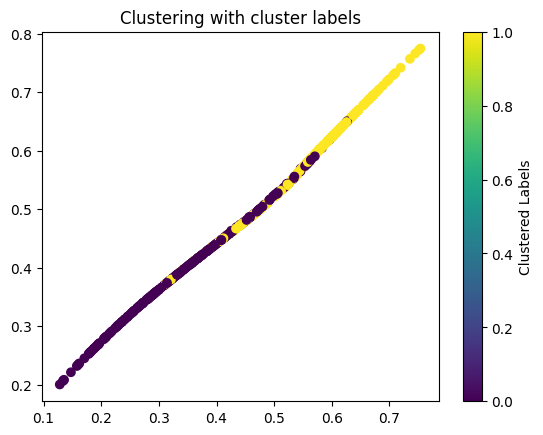

In [ ]:
plt.scatter(predictions[:,0],predictions[:,1], c = labels)
plt.title('Clustering with cluster labels')
plt.colorbar(label='Clustered Labels')
plt.show()

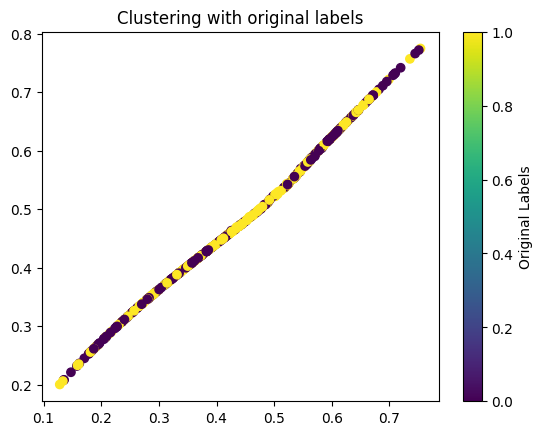

In [ ]:
plt.scatter(predictions[:,0],predictions[:,1], c = y_test)
plt.title('Clustering with original labels')
plt.colorbar(label='Original Labels')
plt.show()

In [ ]:
# Predictions
test_img = glob.glob('/content/drive/MyDrive/Data Science academy /6. Machine Learning/homework6/test/*')
image_path = test_img[1]
img = cv2.imread(image_path, cv2.COLOR_BGR2RGB).astype(np.float32)
img = cv2.resize(img, (80, 80))
img = img/255
img = img.reshape((80,80,3))

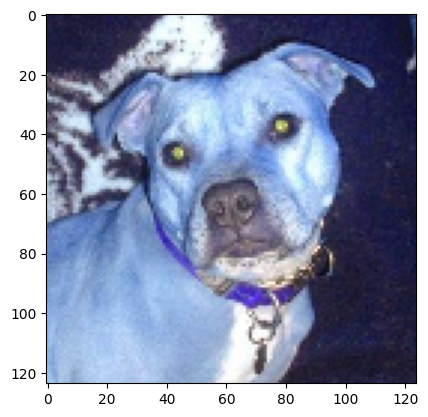

In [ ]:
plt.imshow(img)
plt.show()

In [ ]:
#Predictions with all models
prediction_simple_model = simple_model.predict(img.reshape(1,80,80,3))
print('Prediction with simple dense model: \n')
if prediction_simple_model <= [[0.5]]:
    print('cat')
else:
    print('dog')

prediction_cnn_model = cnn_model.predict(img.reshape(1,80,80,3))
print('Prediction with cnn model: \n')

if prediction_cnn_model <= [[0.5]]:
    print('cat')
else:
    print('dog')

prediction_cnnae_model = cnn_ae.predict(img.reshape(1,80,80,3))
print('Prediction with cnn ae model: \n')
if (prediction_cnnae_model <= [[0.5]]).all():
    print('cat')
else:
    print('dog')


1/1 [==============================] - 0s 74ms/step
Prediction with simple dense model: 

dog
1/1 [==============================] - 0s 274ms/step
Prediction with cnn model: 

dog
1/1 [==============================] - 0s 275ms/step
Prediction with cnn ae model: 

dog


In [ ]:
# Predictions 2
test_img = glob.glob('/content/drive/MyDrive/Data Science academy /6. Machine Learning/homework6/test/*')
image_path1 = test_img[2]
img1 = cv2.imread(image_path1, cv2.COLOR_BGR2RGB).astype(np.float32)
img1 = cv2.resize(img1, (80, 80))
img1 = img1/255
img1 = img1.reshape((80,80,3))

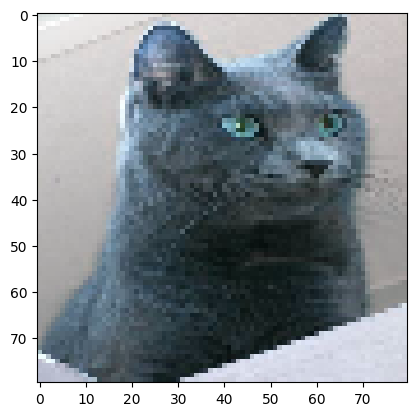

In [ ]:
plt.imshow(img1)
plt.show()

In [ ]:
prediction_simple_model_1 = simple_model.predict(img1.reshape(1,80,80,3))
print('Prediction with simple dense model: \n')
if prediction_simple_model_1 <= [[0.5]]:
    print('cat')
else:
    print('dog')

prediction_cnn_model_1 = cnn_model.predict(img1.reshape(1,80,80,3))
print('Prediction with cnn model: \n')
if prediction_cnn_model_1 <= [[0.5]]:
    print('cat')
else:
    print('dog')

prediction_cnnae_model_1 = cnn_ae.predict(img1.reshape(1,80,80,3))
print('Prediction with cnn ae model: \n')
if (prediction_cnnae_model_1 <= [[0.5]]).all():
    print('cat')
else:
    print('dog')


1/1 [==============================] - 0s 25ms/step
Prediction with simple dense model: 

dog
1/1 [==============================] - 0s 18ms/step
Prediction with cnn model: 

cat
1/1 [==============================] - 0s 17ms/step
Prediction with cnn ae model: 

dog


# Note:
To improve the performance of the models I tried using BatchNormilizer, l1 and l2 normaliziers, different sizes of neurons, layers, different dropout rates, different optimizers, learning rate and different number of batch size. The best results were achieved with these parameters.